<a href="https://colab.research.google.com/github/Dina-samir/Mnist/blob/master/mnist_NN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


**Data preprocessing**

In [0]:
image_height,image_width=28,28
X_train = X_train.reshape(60000,image_height*image_width,1)
X_test = X_test.reshape(10000,image_height*image_width,1)
#rescale image from 0 to 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784, 1)
(10000, 784, 1)
(60000, 10, 10)
(10000, 10, 10)


**Build Model**


In [6]:
model= Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

**Compile Model**


In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**Train The Model**

In [9]:
history= model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 9s 152us/step - loss: 0.1814 - acc: 0.9453 - val_loss: 0.0950 - val_acc: 0.9709
Epoch 2/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0812 - acc: 0.9749 - val_loss: 0.0760 - val_acc: 0.9769
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.0563 - acc: 0.9824 - val_loss: 0.0936 - val_acc: 0.9725
Epoch 4/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0411 - acc: 0.9870 - val_loss: 0.0830 - val_acc: 0.9773
Epoch 5/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0337 - acc: 0.9890 - val_loss: 0.0997 - val_acc: 0.9769
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0779 - val_acc: 0.9812
Epoch 7/20
60000/600

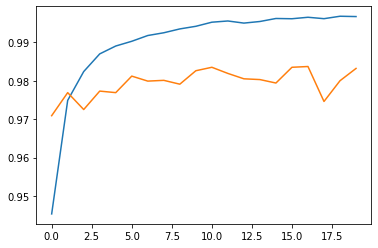

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

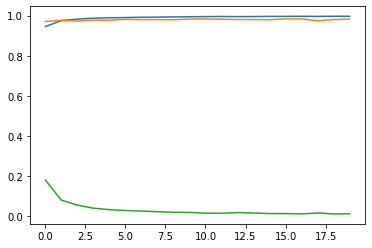

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

In [12]:
score=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 34us/step


In [13]:
score

[0.10959799170846116, 0.9832]